In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

import pandas as pd
%matplotlib inline


## Visualize the stats

In [40]:
stats = pickle.load(open('model/PCamNet_pcam_stats.pkl', 'rb'))

In [41]:
loss_stats = np.array([s[:5] for s in stats])
loss_stats[:, 1] /= loss_stats[:,2]
loss_stats[:, 3] /= loss_stats[:,4]


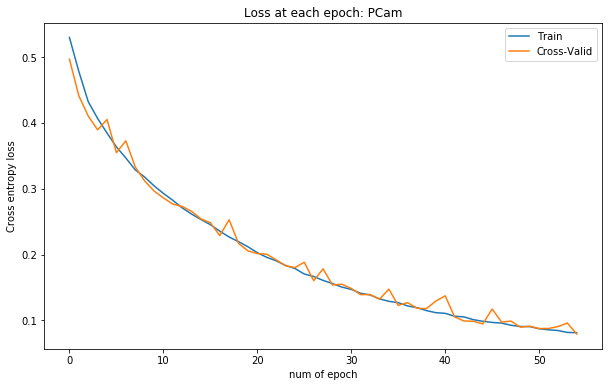

In [42]:
plt.figure(figsize=(10,6))
plt.plot(loss_stats[:,0], loss_stats[:,1])
plt.plot(loss_stats[:,0], loss_stats[:,3])
plt.legend(['Train', 'Cross-Valid'])
plt.title('Loss at each epoch: PCam')
plt.xlabel('num of epoch')
plt.ylabel('Cross entropy loss')
plt.show()

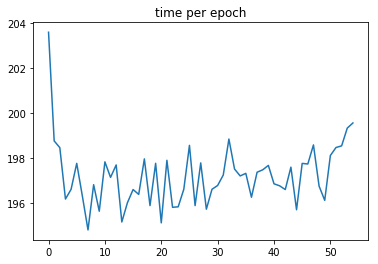

In [43]:

plt.plot(loss_stats[:,0], [s[-1] for s in stats])
plt.title('time per epoch')
plt.show()

In [44]:
def softmax(output):
    ex = np.exp(output)
    norm = np.sum(ex,axis=1).reshape(-1, 1)
    smax = ex/norm
    return smax

In [45]:
acc_l = []
for i in range(len(stats)):
    prob = softmax(np.concatenate(stats[i][5]))
    y_pred = np.argmax(prob, axis=1)
    y_true = np.concatenate(stats[i][6])
    acc_l.append(accuracy_score(y_true, y_pred))
print(y_pred.shape, y_true.shape)

(52352,) (52352,)


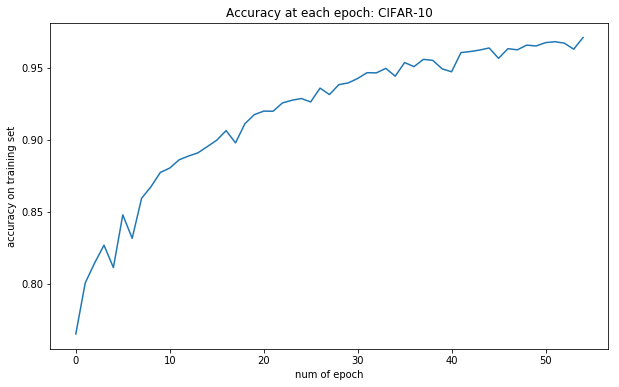

In [46]:
plt.figure(figsize=(10,6))
plt.plot(acc_l)
plt.title('Accuracy at each epoch: CIFAR-10')
plt.xlabel('num of epoch')
plt.ylabel('accuracy on training set')
plt.show()

In [47]:
acc = accuracy_score(y_true, y_pred)
conf_mat = confusion_matrix(y_true, y_pred)

print('accuracy:',acc)
print('confusion matrix:\n', conf_mat)


accuracy: 0.97090846577
confusion matrix:
 [[25696   640]
 [  883 25133]]


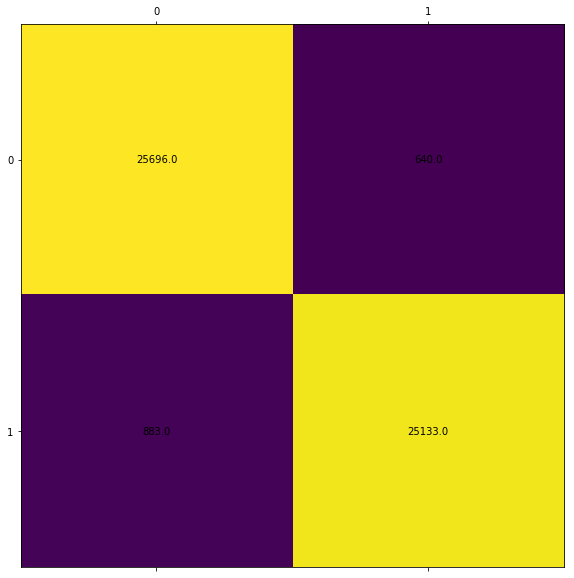

In [53]:
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(conf_mat)
for (i, j), z in np.ndenumerate(conf_mat):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')


plt.show()

## Test accuracy

## Visualizing Embeddings

In [ ]:
X = np.load('model/PCamNet_train_feats.npy')
y = np.load('model/PCamNet_train_labels.npy')

In [ ]:
X_test = np.load('model/PCamNet_test_feats.npy')
y_test =  np.load('model/PCamNet_test_labels.npy')

In [52]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

NameError: name 'X' is not defined

In [ ]:
plt.figure(figsize=(15,10))
pt = plt.scatter(X_pca[:,0], X_pca[:,1],c=y, s=X_pca[:2]*50, cmap=plt.cm.inferno)
plt.colorbar(pt)
plt.show()

In [ ]:
print(y.shape, X_pca.shape)

In [ ]:
df = pd.DataFrame(np.hstack((X_pca, y.reshape(-1,1))))
print(df.shape)
p = pd.plotting.parallel_coordinates(df, 10)

In [ ]:
p = pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')